### Table of contents:

* [2. Visualization and Analysis](#chapter2)
    * [2.1 Requirements](#section_2_1)
    * [2.2 Imports](#section_2_2)
    * [2.3 Get data](#section_2_3)
    * [2.4 Visualize data](#section_2_4)

# 2. Visualization and Analysis <a class="anchor" id="chapter2"></a>

Of the final results.

## 2.1 Requirements <a class="anchor" id="section_2_1"></a>

In [ ]:
pip install matplotlib

In [16]:
pip install seaborn

     |████████████████████████████████| 292 kB 2.9 MB/s 
Note: you may need to restart the kernel to use updated packages.


## 2.2 Imports <a class="anchor" id="section_2_2"></a>

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 2.3 Get data <a class="anchor" id="section_2_3"></a>

In [3]:
data = pd.read_pickle('data_preprocessed_va.pkl')
data.head()

,ID,label,journal,journalTitle,content,authors,publishDate,archiveDate,year,linkToArchive
0,0,literal,publico.pt,Público,dia janeiro jared loughner tentou matar sucess...,[],None,2012-12-30,2012,https://arquivo.pt/wayback/20121230181331/http...
1,1,literal,publico.pt,Público,john nash matemático nobel economia retratado ...,[],None,2016-01-17,2016,https://arquivo.pt/wayback/20160117223452/http...
2,2,estigma,publico.pt,Público,cavaco sairá desta campanha pior entrou casos ...,"['Nuno Ferreira Santos', 'Arquivo']",None,2011-01-21,2011,https://arquivo.pt/wayback/20110121142608/http...
3,3,literal,publico.pt,Público,cientista senadora italiana rita levintalcini ...,['Clara Barata'],None,2013-01-17,2013,https://arquivo.pt/wayback/20130117170513/http...
4,4,literal,publico.pt,Público,ninguém sabe fazer ninguém sabe pensa come sob...,[],None,2015-04-20,2015,https://arquivo.pt/wayback/20150420143056/http...


## 2.4 Visualize data <a class="anchor" id="section_2_4"></a>

In [4]:
# (Number of news, Number of descriptors of each article)

data.shape

(978, 10)

In [5]:
# Descriptors of each article

data.columns

Index(['ID', 'label', 'journal', 'journalTitle', 'content', 'authors',
       'publishDate', 'archiveDate', 'year', 'linkToArchive'],
      dtype='object')

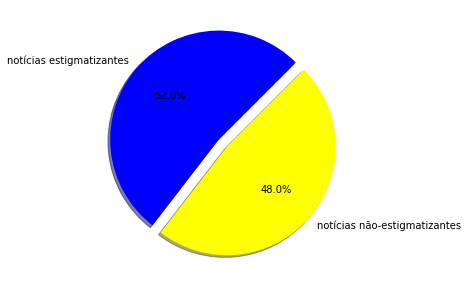

In [6]:
# Frequency of each label/category in all dataset (labelled manually)

fig1 = plt.figure(figsize = (5,5))
colors = ["blue", "yellow"]
stigma = data[data['label'] == "estigma" ]
literal = data[data['label'] == "literal" ]
count = [stigma['label'].count(), literal['label'].count()]
pie = plt.pie(count, labels = ['notícias estigmatizantes', 'notícias não-estigmatizantes'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05))

In [7]:
# Frequency of each label/category in each journal

plt.rcParams["figure.figsize"] = (20,3)
data.groupby('journalTitle').label.value_counts()


journalTitle        label  
A Bola              estigma     12
                    literal      5
Correio da Manhã    literal     31
                    estigma     15
Diário de Notícias  estigma     50
                    literal     39
Expresso            estigma    118
                    literal     98
Jornal de Notícias  literal     31
                    estigma     30
Observador          literal    114
                    estigma    113
Público             estigma    147
                    literal    127
Sábado              estigma      8
                    literal      1
Visão               literal     23
                    estigma     16
Name: label, dtype: int64

In [9]:
# Frequency of each label/category in each topic

plt.rcParams["figure.figsize"] = (20,3)
data.groupby('topic').label.value_counts()

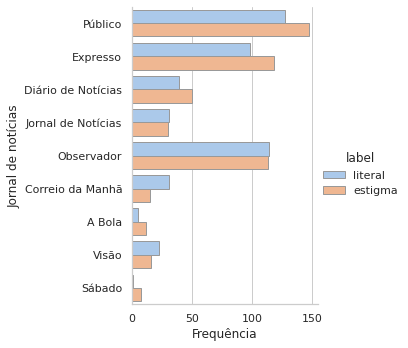

In [10]:
# Plot frequency of each label/category in each journal

sns.set_theme(style="whitegrid")

fig = sns.catplot(y="journalTitle", hue="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
fig.set_xlabels('Frequência', fontsize=12) 
fig.set_ylabels('Jornal de notícias', fontsize=12)

/home/alina/anaconda3/envs/stigma/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


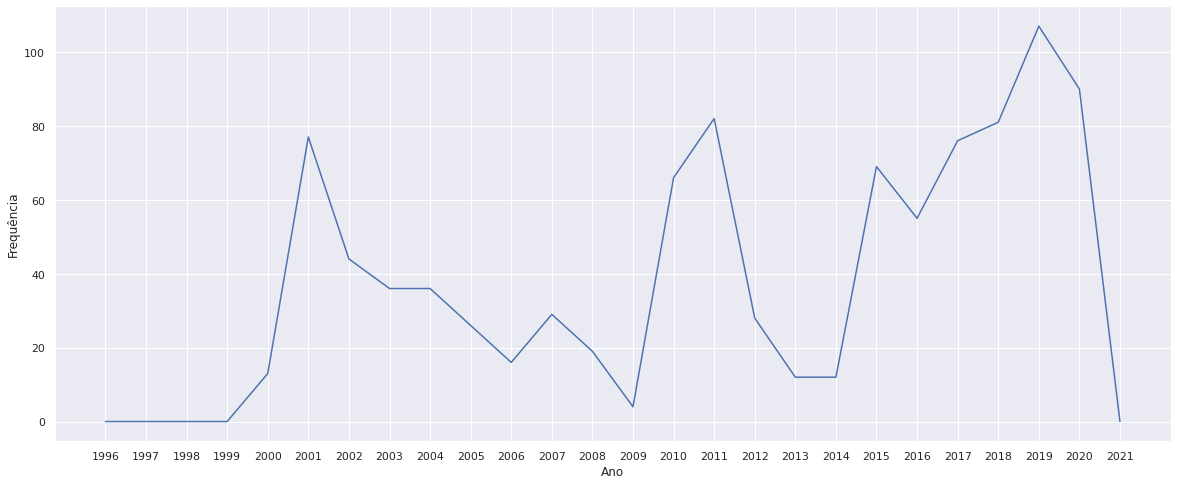

In [11]:
# Number of collected news per year

sns.set_theme(style="darkgrid")

x = ["1996","1997","1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]

y = []
for year in x:
    y.append(data.year.str.count(year).sum())

sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x, y)
plt.xlabel("Ano")
plt.ylabel("Frequência")
plt.show()

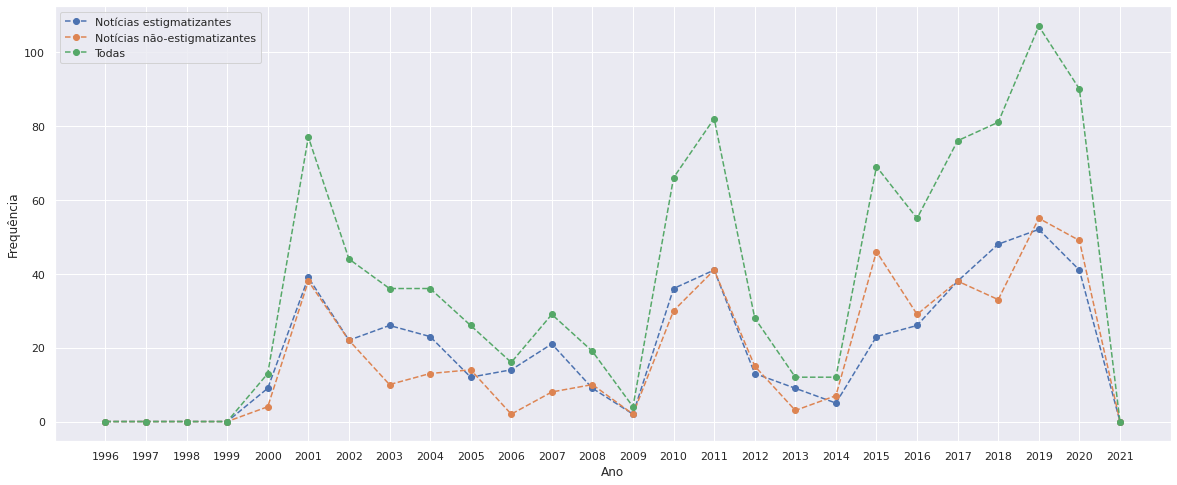

In [13]:
# Evolution of stigmatizing/non-stigmatizing/all news per year

x = ["1996","1997","1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]

y_stigma = []
y_non_stigma = []
y_all = []

for year in x:
    y_stigma.append(stigma.year.str.count(year).sum())
    y_non_stigma.append(literal.year.str.count(year).sum())
    y_all.append(data.year.str.count(year).sum())

plt.plot(x, y_stigma, label="Notícias estigmatizantes",marker='o', linestyle='dashed') 
plt.plot(x, y_non_stigma, label="Notícias não-estigmatizantes", marker='o', linestyle='dashed')
plt.plot(x, y_all, label="Todas", marker='o', linestyle='dashed') 
plt.xlabel("Ano")
plt.ylabel("Frequência")
plt.legend()
plt.show()